In [1]:
#0.Thêm thư viện
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
#1. Nhập dữ liệu vào 
df = pd.read_csv('database.csv')

D:\Data Science\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

### 1. GIAI ĐOẠN TIỀN XỬ LÝ DỮ LIỆU

#### 1.1 Xóa cột không có ý nghĩa trong quá trình phân tích

In [5]:
#Tiền xử lí dữ liệu, xóa các cột không hợp lí
df = df.drop(['Record ID'],axis = 1)

Vì thuộc tính Agency Code không cần thiết cho quá trình phân tích dữ liệu nên ta sẽ loại bỏ ra khỏi df

In [6]:
df = df.drop(['Agency Code'],axis = 1)

In [7]:
df

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


#### Dữ liệu ngày tháng và địa điểm không có ý nghĩa trong việc tìm kiếm mối quan hệ giữa hung thủ và nạn nhân nên ta loại bỏ 4 cột này ra khỏi df

In [8]:
df = df.drop(['City','State','Year','Month'],axis = 1)
df

,Agency Name,Agency Type,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,Anchorage,Municipal Police,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,Anchorage,Municipal Police,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,Anchorage,Municipal Police,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Park County,Sheriff,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,Sheridan County,Sheriff,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,Sheridan,Municipal Police,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,Sublette County,Sheriff,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


#### Dữ liệu Record Source không có ý nghĩa trong việc tìm mối liên hệ giữa hung thủ và nạ nhân nên ta loại bỏ Record Source ra khỏi df


In [9]:
df = df.drop(['Record Source'],axis = 1)
df

,Agency Name,Agency Type,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Anchorage,Municipal Police,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Anchorage,Municipal Police,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,Anchorage,Municipal Police,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,Anchorage,Municipal Police,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,Anchorage,Municipal Police,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Park County,Sheriff,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
638450,Sheridan County,Sheriff,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0
638451,Sheridan,Municipal Police,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0
638452,Sublette County,Sheriff,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1


#### Tên cơ quan điều tra và loại của quan điều tra không ảnh hưởng đến quá trình điều tra để tìm mối liên hệ nên cũng loại khỏi dataframe

In [10]:
df = df.drop(['Agency Name','Agency Type'],axis = 1)
df

,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
638450,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0
638451,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0
638452,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1


#### Cột Incedent dựa vào thời gian để đếm số vụ án nên thuộc tính thời gian đã xóa --> Xóa luôn thuộc tính này


In [11]:
df = df.drop(['Incident'],axis = 1)
df

,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0
638450,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0
638451,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0
638452,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1


### Theo tài liệu chính gốc data thì Victim Count, và Perpetrator Count không được định nghĩa rõ ràng trong việc thu thập dữ liệu nên ta sẽ loại bỏ thuộc tính ra khỏi dataframe (phân tích không có ý nghĩa)

In [12]:
df = df.drop(['Victim Count','Perpetrator Count'],axis = 1)
df

,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
638450,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
638451,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife


#### Muốn biết mối quan hệ giữa hung thủ và nạn nhân thì ta không cần quan tâm đến thuộc tính Crime Solved nên ta xóa thuộc tính Crime Solved

In [13]:
df = df.drop(['Crime Solved'],axis = 1)
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife


In [14]:
#Xử lí dữ liệu bị thiếu
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Weapon,0,0.0
Relationship,0,0.0
Perpetrator Ethnicity,0,0.0
Perpetrator Race,0,0.0
Perpetrator Age,0,0.0


=> Không có dữ liệu NULL

In [15]:
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Murder or Manslaughter,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Crime Type             638454 non-null  object
 1   Victim Sex             638454 non-null  object
 2   Victim Age             638454 non-null  int64 
 3   Victim Race            638454 non-null  object
 4   Victim Ethnicity       638454 non-null  object
 5   Perpetrator Sex        638454 non-null  object
 6   Perpetrator Age        638454 non-null  object
 7   Perpetrator Race       638454 non-null  object
 8   Perpetrator Ethnicity  638454 non-null  object
 9   Relationship           638454 non-null  object
 10  Weapon                 638454 non-null  object
dtypes: int64(1), object(10)
memory usage: 53.6+ MB


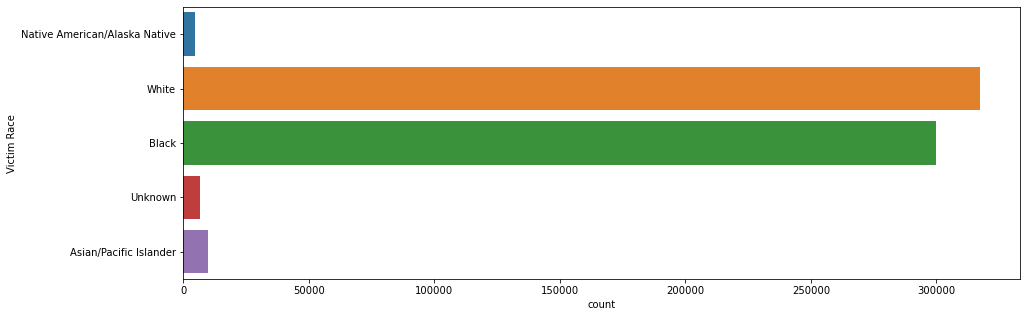

In [17]:
#Xem thuộc tính Victim Race
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Victim Race',data =df)
plt.show()

#### Vì dữ liệu unknown chỉ chiếm một phần ít ta có thể nhiều cách, cách thứ 1 thay thế unknown bằng white, cách thứ 2 là xóa luôn những dòng có unknow

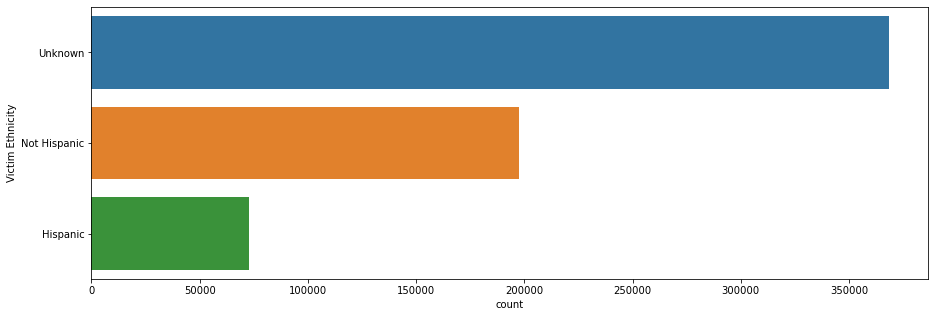

In [18]:
#Xem thuộc tính Victim Ethnicity
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Victim Ethnicity',data =df)
plt.show()

#### Cột Victim Ethnicity chứa rất nhiều dòng Unknown --> Không có ý nghĩa trong phân tích nên loại cột này đi

In [19]:
df = df.drop(['Victim Ethnicity'],axis = 1)
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Murder or Manslaughter,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Unknown,0,Unknown,Unknown,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Male,57,White,Unknown,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,White,Not Hispanic,Stranger,Knife


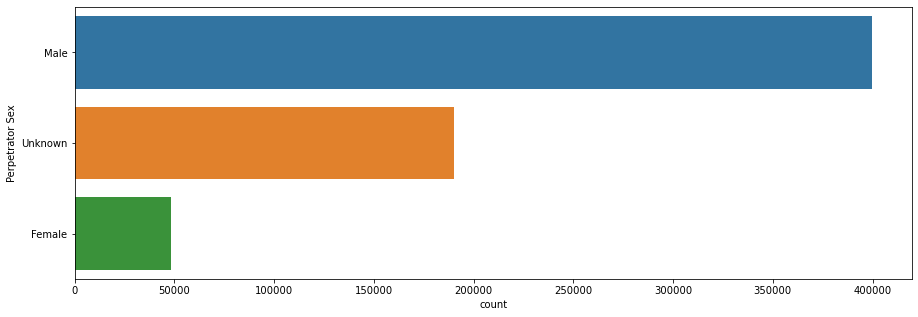

In [20]:
#Xem thuộc tính Perpetrator Sex
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Perpetrator Sex',data =df)
plt.show()

In [21]:
df['Perpetrator Sex'][df['Perpetrator Sex']=='Unknown']='Others'

<ipython-input-21-44125c78fb8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Perpetrator Sex'][df['Perpetrator Sex']=='Unknown']='Others'


In [22]:
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Unknown,Unknown,Unknown
3,Murder or Manslaughter,Male,43,White,Male,42,White,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Others,0,Unknown,Unknown,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Male,57,White,Unknown,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,White,Not Hispanic,Stranger,Knife


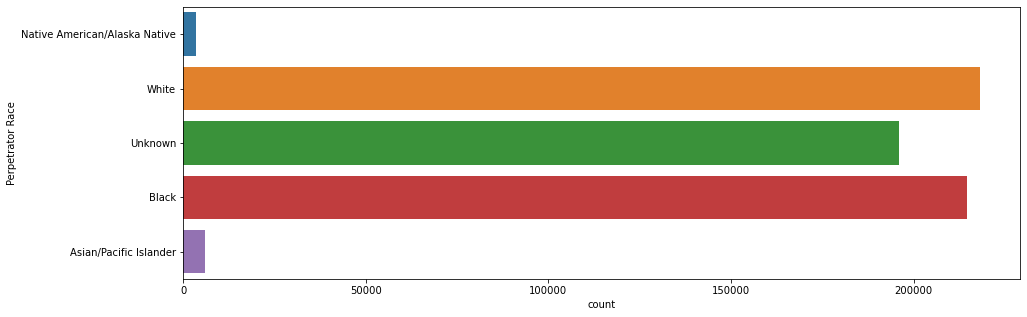

In [23]:
#Xem thuộc tính Perpetrator Race
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Perpetrator Race',data =df)
plt.show()

#### Unknown quá nhiều nên xóa cột Perpetrator Race

In [24]:
df = df.drop(['Perpetrator Race'],axis = 1)
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Ethnicity,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Unknown,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,Unknown,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Unknown,Unknown
3,Murder or Manslaughter,Male,43,White,Male,42,Unknown,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Others,0,Unknown,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Male,57,Unknown,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Unknown,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,Not Hispanic,Stranger,Knife


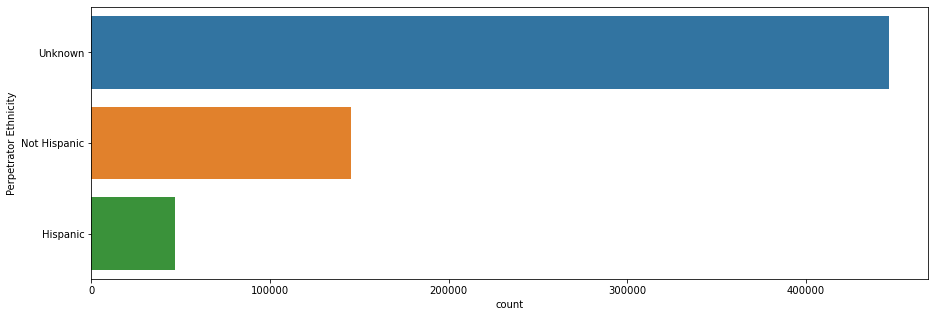

In [25]:
#Xem thuộc tính Perpetrator Ethnicity
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Perpetrator Ethnicity',data =df)
plt.show()

### Thuộc tính Unknown quá nhiều nên xóa cột Perpetrator Ethnicity

In [26]:
df = df.drop(['Perpetrator Ethnicity'],axis = 1)
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Unknown
3,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Unknown
...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Others,0,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Male,57,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,Stranger,Knife


Xét thuộc tính Weapon

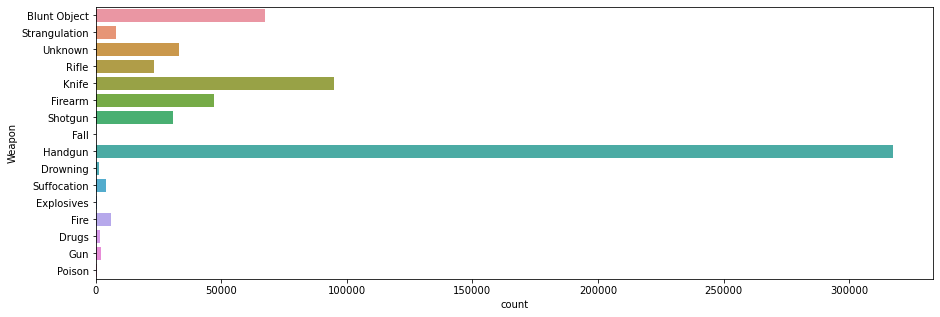

In [27]:
#Xem thuộc tính Perpetrator Ethnicity
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Weapon',data =df)
plt.show()

In [28]:
#Giữ lại Unknown bằng Other
df['Weapon'][df['Weapon']=='Unknown']='Others'

<ipython-input-28-8045a1bf7574>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weapon'][df['Weapon']=='Unknown']='Others'


In [29]:
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Others
3,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,Unknown,Others
...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Others,0,Unknown,Handgun
638450,Murder or Manslaughter,Male,62,White,Male,57,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,Stranger,Knife


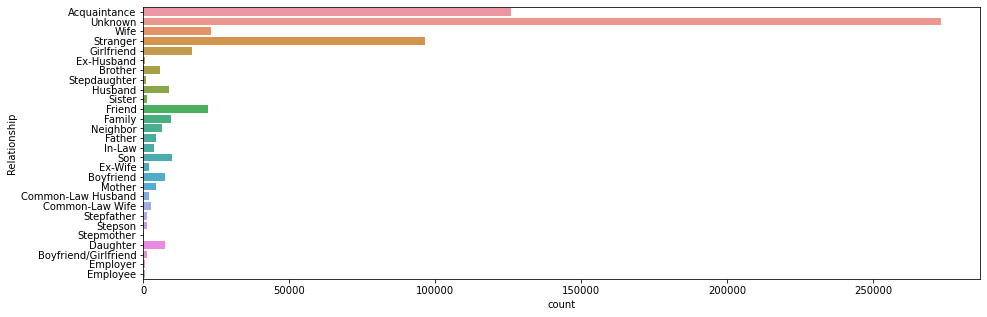

In [30]:
#Xem thuộc tính Perpetrator Ethnicity
plt.figure(1,figsize=(15,5))
sns.countplot(y = 'Relationship',data =df)
plt.show()

#### Thay thế thuộc tính có unknown bằng np.nan

In [31]:
df.replace('Unknown',np.nan,inplace=True)

In [32]:
df

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
2,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,NaN,Others
3,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
4,Murder or Manslaughter,Female,30,Native American/Alaska Native,Others,0,NaN,Others
...,...,...,...,...,...,...,...,...
638449,Murder or Manslaughter,Male,30,White,Others,0,NaN,Handgun
638450,Murder or Manslaughter,Male,62,White,Male,57,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,Stranger,Knife


#### 1.2 Xóa dữ liệu Null hoặc Unknown

Giá trị dữ liệu = Unknown không có ý nghĩa trong quá trình tìm kiếm mối quan hệ giữa hung thủ và nạn nhân nên ta xóa những thuộc tính Unknown đó

In [33]:
test=df.dropna()

In [34]:
test

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
3,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
5,Murder or Manslaughter,Male,30,White,Male,36,Acquaintance,Rifle
6,Murder or Manslaughter,Female,42,Native American/Alaska Native,Male,27,Wife,Knife
...,...,...,...,...,...,...,...,...
638448,Murder or Manslaughter,Male,29,Native American/Alaska Native,Male,67,Friend,Firearm
638450,Murder or Manslaughter,Male,62,White,Male,57,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,Stranger,Knife


In [35]:
test

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,Male,14,Native American/Alaska Native,Male,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
3,Murder or Manslaughter,Male,43,White,Male,42,Acquaintance,Strangulation
5,Murder or Manslaughter,Male,30,White,Male,36,Acquaintance,Rifle
6,Murder or Manslaughter,Female,42,Native American/Alaska Native,Male,27,Wife,Knife
...,...,...,...,...,...,...,...,...
638448,Murder or Manslaughter,Male,29,Native American/Alaska Native,Male,67,Friend,Firearm
638450,Murder or Manslaughter,Male,62,White,Male,57,Acquaintance,Handgun
638451,Murder or Manslaughter,Female,0,Asian/Pacific Islander,Female,22,Daughter,Suffocation
638452,Murder or Manslaughter,Male,55,White,Male,31,Stranger,Knife


In [36]:
Sex_temp ={"Male":0,"Female":1}
for dataset in [test]:
    dataset['Victim Sex']=dataset['Victim Sex'].map(Sex_temp)

<ipython-input-36-3bac6d23a2d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Victim Sex']=dataset['Victim Sex'].map(Sex_temp)


In [37]:
for dataset in [test]:
    dataset['Perpetrator Sex']=dataset['Perpetrator Sex'].map(Sex_temp)

<ipython-input-37-5c771d54ba00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Perpetrator Sex']=dataset['Perpetrator Sex'].map(Sex_temp)


In [38]:
test

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,0,14,Native American/Alaska Native,0.0,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,0,43,White,0.0,42,Acquaintance,Strangulation
3,Murder or Manslaughter,0,43,White,0.0,42,Acquaintance,Strangulation
5,Murder or Manslaughter,0,30,White,0.0,36,Acquaintance,Rifle
6,Murder or Manslaughter,1,42,Native American/Alaska Native,0.0,27,Wife,Knife
...,...,...,...,...,...,...,...,...
638448,Murder or Manslaughter,0,29,Native American/Alaska Native,0.0,67,Friend,Firearm
638450,Murder or Manslaughter,0,62,White,0.0,57,Acquaintance,Handgun
638451,Murder or Manslaughter,1,0,Asian/Pacific Islander,1.0,22,Daughter,Suffocation
638452,Murder or Manslaughter,0,55,White,0.0,31,Stranger,Knife


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362710 entries, 0 to 638453
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Crime Type       362710 non-null  object 
 1   Victim Sex       362710 non-null  int64  
 2   Victim Age       362710 non-null  int64  
 3   Victim Race      362710 non-null  object 
 4   Perpetrator Sex  350765 non-null  float64
 5   Perpetrator Age  362710 non-null  object 
 6   Relationship     362710 non-null  object 
 7   Weapon           362710 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 24.9+ MB


#### 1.3 Rời rạc hóa dữ liệu

#### Vì tuổi của nạn nhân có giá trị 998, tuổi hung thủ có giá trị 0,1,2,.... --> Dữ liệu bị nhiễu ta sẽ thay thế dữ liệu bằng phương pháp làm mịn binning

In [40]:
testmap = pd.qcut(test['Victim Age'], q=4)

In [41]:
testmap

0         (-0.001, 22.0]
1          (42.0, 998.0]
3          (42.0, 998.0]
5           (22.0, 30.0]
6           (30.0, 42.0]
               ...      
638448      (22.0, 30.0]
638450     (42.0, 998.0]
638451    (-0.001, 22.0]
638452     (42.0, 998.0]
638453    (-0.001, 22.0]
Name: Victim Age, Length: 362710, dtype: category
Categories (4, interval[float64]): [(-0.001, 22.0] < (22.0, 30.0] < (30.0, 42.0] < (42.0, 998.0]]

In [42]:
df['quantile_ex_1'] = pd.qcut(test['Victim Age'], q=4)

In [43]:
df['quantile_ex_1'].value_counts()

(-0.001, 22.0]    96522
(42.0, 998.0]     90028
(30.0, 42.0]      88859
(22.0, 30.0]      87301
Name: quantile_ex_1, dtype: int64

Chia làm 4 giỏ ta có như sau: 
    <=22 : Kí hiệu là '1'
    (22;30] : Kí hiệu là '2'
    (30;42] : Kí hiệu là '3'
    >42     : Kí hiệu là '4'

In [44]:
for dataset1 in [test]:
    dataset1['Victim Age']=dataset1['Victim Age'].astype(int)
    dataset1.loc[dataset['Victim Age']<=22,'Victim Age']=1
    dataset1.loc[(dataset['Victim Age']>22) & (dataset1['Victim Age']<=30),'Victim Age']=2
    dataset1.loc[(dataset['Victim Age']>30) & (dataset1['Victim Age']<=42),'Victim Age']=3
    dataset1.loc[dataset['Victim Age']>42,'Victim Age']=4

<ipython-input-44-c30f2ea76ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Victim Age']=dataset1['Victim Age'].astype(int)
D:\Data Science\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Data Science\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [45]:
test

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,0,1,Native American/Alaska Native,0.0,15,Acquaintance,Blunt Object
1,Murder or Manslaughter,0,4,White,0.0,42,Acquaintance,Strangulation
3,Murder or Manslaughter,0,4,White,0.0,42,Acquaintance,Strangulation
5,Murder or Manslaughter,0,2,White,0.0,36,Acquaintance,Rifle
6,Murder or Manslaughter,1,3,Native American/Alaska Native,0.0,27,Wife,Knife
...,...,...,...,...,...,...,...,...
638448,Murder or Manslaughter,0,2,Native American/Alaska Native,0.0,67,Friend,Firearm
638450,Murder or Manslaughter,0,4,White,0.0,57,Acquaintance,Handgun
638451,Murder or Manslaughter,1,1,Asian/Pacific Islander,1.0,22,Daughter,Suffocation
638452,Murder or Manslaughter,0,4,White,0.0,31,Stranger,Knife


### Rời rạc hóa tuổi hung thủ

In [46]:
test['Perpetrator Age']=pd.to_numeric(test['Perpetrator Age'])

<ipython-input-46-726bd5964542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Perpetrator Age']=pd.to_numeric(test['Perpetrator Age'])


In [47]:
test['Perpetrator Age'].unique()

array([15, 42, 36, 27, 35, 49, 39, 29, 23, 33, 28, 25,  7, 21, 43, 26, 38,
       66, 40, 32, 37, 22, 30, 24, 65, 19, 51, 60, 45, 64, 17, 18, 20, 61,
       44, 73, 62,  0, 69, 52, 16, 90, 34, 56, 47, 41, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 53, 59,
       79, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 11, 74, 83,  8, 84, 85,
       86, 10,  5,  3, 88, 95,  4, 91, 92, 96, 94,  2,  1, 98, 97],
      dtype=int64)

In [48]:
testmap = pd.qcut(test['Perpetrator Age'], q=4)

In [49]:
testmap

0         (-0.001, 20.0]
1           (37.0, 99.0]
3           (37.0, 99.0]
5           (27.0, 37.0]
6           (20.0, 27.0]
               ...      
638448      (37.0, 99.0]
638450      (37.0, 99.0]
638451      (20.0, 27.0]
638452      (27.0, 37.0]
638453      (20.0, 27.0]
Name: Perpetrator Age, Length: 362710, dtype: category
Categories (4, interval[float64]): [(-0.001, 20.0] < (20.0, 27.0] < (27.0, 37.0] < (37.0, 99.0]]

In [50]:
df['quantile_ex_2'] = pd.qcut(test['Perpetrator Age'], q=4)

In [51]:
df['quantile_ex_2'].value_counts()

(-0.001, 20.0]    94992
(20.0, 27.0]      91716
(37.0, 99.0]      88407
(27.0, 37.0]      87595
Name: quantile_ex_2, dtype: int64

Chia làm 4 giỏ ta có như sau: <=21 : Kí hiệu là '1' (21;28] : Kí hiệu là '2' (28;38] : Kí hiệu là '3' >38 : Kí hiệu là '4'

In [52]:
for dataset in [test]:
    dataset['Perpetrator Age']=dataset['Perpetrator Age'].astype(int)
    dataset.loc[dataset['Perpetrator Age']<=21,'Perpetrator Age']=1
    dataset.loc[(dataset['Perpetrator Age']>21) & (dataset['Perpetrator Age']<=28),'Perpetrator Age']=2
    dataset.loc[(dataset['Perpetrator Age']>28) & (dataset['Perpetrator Age']<=38),'Perpetrator Age']=3
    dataset.loc[dataset['Perpetrator Age']>38,'Perpetrator Age']=4

<ipython-input-52-442e2952906d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Perpetrator Age']=dataset['Perpetrator Age'].astype(int)
D:\Data Science\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Data Science\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [53]:
test

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,0,1,Native American/Alaska Native,0.0,1,Acquaintance,Blunt Object
1,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Strangulation
3,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Strangulation
5,Murder or Manslaughter,0,2,White,0.0,3,Acquaintance,Rifle
6,Murder or Manslaughter,1,3,Native American/Alaska Native,0.0,2,Wife,Knife
...,...,...,...,...,...,...,...,...
638448,Murder or Manslaughter,0,2,Native American/Alaska Native,0.0,4,Friend,Firearm
638450,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Handgun
638451,Murder or Manslaughter,1,1,Asian/Pacific Islander,1.0,2,Daughter,Suffocation
638452,Murder or Manslaughter,0,4,White,0.0,3,Stranger,Knife


# Xuất dữ liệu ra file csv

In [54]:
test.to_csv('data_daxuly.csv')

### 2. GIAI ĐOẠN KHAI THÁC DỮ LIỆU

In [55]:
# Giai đoạn 1: import dữ liệu đã xử lý vào
df2 = pd.read_csv('data_daxuly.csv')
df2

,Unnamed: 0,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,0,Murder or Manslaughter,0,1,Native American/Alaska Native,0.0,1,Acquaintance,Blunt Object
1,1,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Strangulation
2,3,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Strangulation
3,5,Murder or Manslaughter,0,2,White,0.0,3,Acquaintance,Rifle
4,6,Murder or Manslaughter,1,3,Native American/Alaska Native,0.0,2,Wife,Knife
...,...,...,...,...,...,...,...,...,...
362705,638448,Murder or Manslaughter,0,2,Native American/Alaska Native,0.0,4,Friend,Firearm
362706,638450,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Handgun
362707,638451,Murder or Manslaughter,1,1,Asian/Pacific Islander,1.0,2,Daughter,Suffocation
362708,638452,Murder or Manslaughter,0,4,White,0.0,3,Stranger,Knife


In [56]:
df2 = df2.drop(['Unnamed: 0'],axis=1)
df2

,Crime Type,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
0,Murder or Manslaughter,0,1,Native American/Alaska Native,0.0,1,Acquaintance,Blunt Object
1,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Strangulation
2,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Strangulation
3,Murder or Manslaughter,0,2,White,0.0,3,Acquaintance,Rifle
4,Murder or Manslaughter,1,3,Native American/Alaska Native,0.0,2,Wife,Knife
...,...,...,...,...,...,...,...,...
362705,Murder or Manslaughter,0,2,Native American/Alaska Native,0.0,4,Friend,Firearm
362706,Murder or Manslaughter,0,4,White,0.0,4,Acquaintance,Handgun
362707,Murder or Manslaughter,1,1,Asian/Pacific Islander,1.0,2,Daughter,Suffocation
362708,Murder or Manslaughter,0,4,White,0.0,3,Stranger,Knife


<AxesSubplot:>

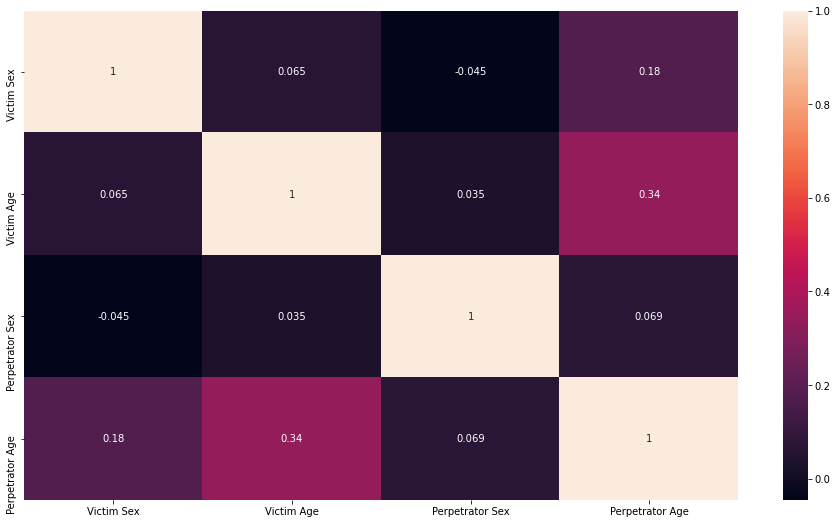

In [57]:
#Giai đoạn 2: Xét thuộc tính tương đồng của các thuộc tính
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(method='pearson'),annot=True)

In [58]:
#Giai đoạn 3: Tách dữ liệu thành 2 phần --- phần 1: dữ liệu bình thường (feature), phần 2: dữ liệu chứa thuộc tính quyết định
feature = df2.drop('Relationship',axis=1)
label = df2['Relationship']

In [59]:
feature['Perpetrator Age']= feature['Perpetrator Age'].astype(object)

In [60]:
feature['Victim Age']= feature['Victim Age'].astype(object)

In [61]:
#Chuyển đổi dữ liệu không phải số về dạng số bằng one hot vector
feature.select_dtypes(exclude=['int64']).columns

Index(['Crime Type', 'Victim Age', 'Victim Race', 'Perpetrator Sex',
       'Perpetrator Age', 'Weapon'],
      dtype='object')

In [62]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,Victim Sex,Crime Type_Manslaughter by Negligence,Crime Type_Murder or Manslaughter,Victim Age_1,Victim Age_2,Victim Age_3,Victim Age_4,Victim Race_Asian/Pacific Islander,Victim Race_Black,Victim Race_Native American/Alaska Native,...,Weapon_Firearm,Weapon_Gun,Weapon_Handgun,Weapon_Knife,Weapon_Others,Weapon_Poison,Weapon_Rifle,Weapon_Shotgun,Weapon_Strangulation,Weapon_Suffocation
0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362705,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
362706,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
362707,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
362708,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
#Chia dữ liệu test và train theo tỉ lệ train:test = 70:30 với test_size = 30%
X_train,X_test,y_train,y_test = train_test_split(feature_onehot,label,test_size=0.3,random_state=42)

In [64]:
from datetime import datetime, timedelta
import time

#### Giai đoạn chạy thuật toán ID3

In [ ]:
#Giai đoạn 4: Chạy thuật toán
#Xây dựng cây ID3
#Đặt time chạy thuật toán
start_ID3 = time.time()
clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf1.fit(X_train,y_train)
end_ID3= time.time()
thoigian1 = timedelta(seconds=round(end_ID3-start_ID3,4))
print(thoigian1)

In [ ]:
clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf1.fit(X_train,y_train)

In [ ]:
tree_pred1 = clf1.predict(X_test)

tree_score1 = metrics.accuracy_score(y_test,tree_pred1)
print("Độ chính xác:",tree_score1)
print("Report:",metrics.classification_report(y_test,tree_pred1))

In [ ]:
#Tính toán ma trận nhầm lẫn
tree_cm1 = metrics.confusion_matrix(y_test,tree_pred1)

In [ ]:
#Vẽ đồ thị ma trận nhầm lẫn
plt.figure(figsize=(15,15))
sns.heatmap(tree_cm1,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score1)
plt.title(title,size=15);

In [ ]:
#Vẽ cây ID3
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

#### Giai đoạn chạy thuật toán CART

In [ ]:
#Xây dựng cây CART
#Đặt time chạy thuật toán
start_CART = time.time()
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(X_train,y_train)
end_CART= time.time()
thoigian2 = timedelta(seconds=round(end_CART-start_CART,4))
print(thoigian2)

In [ ]:
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(X_train,y_train)

In [ ]:
tree_pred2 = clf2.predict(X_test)

tree_score2 = metrics.accuracy_score(y_test,tree_pred2)
print("Độ chính xác:",tree_score2)
print("Report:",metrics.classification_report(y_test,tree_pred2))

In [ ]:
#Tính toán ma trận nhầm lẫn
tree_cm2 = metrics.confusion_matrix(y_test,tree_pred1)

In [ ]:
#Vẽ đồ thị ma trận nhầm lẫn
plt.figure(figsize=(15,15))
sns.heatmap(tree_cm2,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score2)
plt.title(title,size=15);

#### Giai đoạn chạy thuật toán Naive Bayes

In [ ]:
start_Bayes = time.time()
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)
end_Bayes= time.time()
thoigian3 = timedelta(seconds=round(end_Bayes-start_Bayes,4))
print(thoigian3)

In [ ]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Độ chính xác:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

### 4. ĐÁNH GIÁ THUẬT TOÁN

In [ ]:
#Đo thời gian của 3 thuật toán
ax = sns.distplot(end_ID3-start_ID3, bins=10, label = 'Thuật toán ID3', kde = False)
ax = sns.distplot(end_CART-start_CART, bins=10, label = 'Thuật toán CART', kde = False)
ax = sns.distplot(end_Bayes-start_Bayes, bins=10, label = 'Thuật toán Naive Bayes', kde = False)
ax.legend()
ax.set_title('Thời gian chạy của 3 thuật toán')

#Thời gian chạy của thuật toán CART là nhanh nhất đối với tập dữ liệu

In [ ]:
#Đo độ chính xác của 3 thuật toán
ax = sns.distplot(tree_score1, bins=10, label = 'Thuật toán ID3', kde = False)
ax = sns.distplot(tree_score2, bins=10, label = 'Thuật toán CART', kde = False)
ax = sns.distplot(bayes_score, bins=10, label = 'Thuật toán Naive Bayes', kde = False)
ax.legend()
ax.set_title('Độ chính xác của 3 thuật toán')

In [ ]:
#Độ chính xác của thuật toán ID3 và CART gần bằng nhau dường như nó đè lên nhau

=> Dựa vào thời gian chạy thuật toán và độ chính xác của thuật toán ta có thể lấy thuộc tính CART để ứng dụng với mô hình này

### 5. Dự báo

In [ ]:
dubao = pd.read_csv('testdubao_1.csv')

In [ ]:
dubao

In [ ]:

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from itertools import chain

In [ ]:
relation_pred = clf2.predict(dubao)
print(relation_pred)
res = "".join(chain(*relation_pred))
print(metrics.classification_report(y_test,tree_pred2,labels=[res]))

### 6. Thuật toán Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
#Đặt time chạy thuật toán
start_RF = time.time()
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
end_RF= time.time()
thoigian3 = timedelta(seconds=round(end_RF-start_RF,4))
print(thoigian3)

0:00:24.088900


In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47459402828706126


In [ ]:
#Độ chính xác của thuật toán Random Forest > thuật toán ID3 và CART nhưng thời gian chạy thuật toán chậm hơn